In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../data/zillow_data.csv')

In [3]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.shape

(14723, 272)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
df.isna().sum().head(20)

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
CountyName       0
SizeRank         0
1996-04       1039
1996-05       1039
1996-06       1039
1996-07       1039
1996-08       1039
1996-09       1039
1996-10       1039
1996-11       1039
1996-12       1039
1997-01       1039
1997-02       1039
1997-03       1039
1997-04       1039
dtype: int64

Trying to see if we can shortlist these entries based on ROI over 4, 8, 12, 16 year period(april of 4x years before 4/2018)

In [7]:
#df['roi_4years'] = ((df['2018-04'] - df['2014-04'])/df['2014-04'])*100
#df['roi_8years'] = ((df['2018-04'] - df['2010-04'])/df['2010-04'])*100
#df['roi_12years'] = ((df['2018-04'] - df['2006-04'])/df['2006-04'])*100
#df['roi_16years'] = ((df['2018-04'] - df['2002-04'])/df['2002-04'])*100

In [8]:
#df_rois = df.loc[:, ['roi_4years', 'roi_8years', 'roi_12years', 'roi_16years',
#           'RegionID', 'City', 'State', 'CountyName', 'SizeRank']]

In [9]:
#df_rois.isna().sum()

In [10]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [11]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City',
                                  'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [72]:
def melt_data_ROI(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City',
                                  'State', 'Metro', 'CountyName', 'RegionID', 'SizeRank', 'ROI_5yrs'],
                     var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [12]:
melted_df = melt_data(df)

In [13]:
melted_df.head(5)

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago,Cook,84654,1,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,90668,2,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,91982,3,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,84616,4,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,93144,5,1996-04-01,77300.0


In [14]:
melted_df.tail(5)

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
3901590,1338,Ashfield,MA,Greenfield Town,Franklin,58333,14719,2018-04-01,209300.0
3901591,3293,Woodstock,NH,Claremont,Grafton,59107,14720,2018-04-01,225800.0
3901592,40404,Berea,KY,Richmond,Madison,75672,14721,2018-04-01,133400.0
3901593,81225,Mount Crested Butte,CO,NaN,Gunnison,93733,14722,2018-04-01,664400.0
3901594,89155,Mesquite,NV,Las Vegas,Clark,95851,14723,2018-04-01,357200.0


In [15]:
melted_df.shape

(3744704, 9)

In [38]:
new_df = pd.DataFrame()
new_df['time'] = pd.date_range(start='1996-04-01', end='2018-04-01', freq='MS')

In [39]:
new_df

,time
0,1996-04-01
1,1996-05-01
2,1996-06-01
3,1996-07-01
4,1996-08-01
...,...
260,2017-12-01
261,2018-01-01
262,2018-02-01
263,2018-03-01


In [ ]:
#def add_home_median_values(row, df):
#if row.time == df.time:
#    new_df.value = row.value
    

Based on our group discuassion we have decided to narrow down the zipcodes to the Chicago area.


For our initial models and eda we have shortlisted the top 30 zipcodes based on their ROI in the last 5 years.

For now I'll be looking into these 10 (top 20through 30) Chicago zipcodes to get some sense of the data and run some Time Series Models.

In [65]:
df_chi_metro = df[df['Metro'] == 'Chicago']

In [66]:
df_chi_metro['ROI_5yrs'] = ((df_chi_metro['2018-04'] -df_chi_metro['2013-04'])/df_chi_metro['2018-04'])*100

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
df_chi_metro.sort_values('ROI_5yrs', ascending=False)[:30]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_5yrs
948,84693,60804,Cicero,IL,Chicago,Cook,949,96500.0,97000.0,97300.0,...,155800,156800,157900,159200,160500,161800,162900,163800,164400,50.669100
383,84340,60085,Waukegan,IL,Chicago,Lake,384,96100.0,96700.0,97100.0,...,107100,107300,106800,107200,107600,108600,110800,113400,114500,45.502183
5896,84403,60153,Maywood,IL,Chicago,Cook,5897,88600.0,88400.0,88000.0,...,128200,130400,133500,136700,139200,142000,144100,144800,145500,44.673540
3337,84364,60110,Carpentersville,IL,Chicago,Kane,3338,112100.0,113100.0,113600.0,...,153200,154300,155200,156500,158100,159200,160100,161800,163200,44.301471
6727,84358,60104,Bellwood,IL,Chicago,Cook,6728,97900.0,98300.0,98600.0,...,139300,141000,142900,144200,145300,146700,148300,149800,150700,43.397478
1392,84541,60505,Aurora,IL,Chicago,Kane,1393,79300.0,80000.0,80200.0,...,118700,119500,120800,122900,125500,127600,129200,131100,132100,43.300530
1496,84648,60651,Chicago,IL,Chicago,Cook,1497,74700.0,75100.0,75400.0,...,136100,137300,139600,141800,142900,145200,148300,150300,150900,43.207422
725,84329,60073,Round Lake Beach,IL,Chicago,Lake,726,125200.0,126100.0,126600.0,...,139700,140400,141200,142300,143400,144600,146300,147700,148100,41.796084
6496,84487,60436,Joliet,IL,Chicago,Will,6497,78200.0,78300.0,78400.0,...,103600,105000,107000,109200,111200,112700,114100,116100,117700,39.932031
658,84639,60639,Chicago,IL,Chicago,Cook,659,111200.0,111900.0,112300.0,...,223100,222900,223300,224600,226100,228700,231400,232700,232600,39.681857


In [70]:
list(df_chi_metro.sort_values('ROI_5yrs', ascending=False)[20:30].RegionName)

[60612, 60164, 60501, 60131, 60162, 60409, 60123, 60647, 60632, 60622]

In [91]:
chicago_20_30 = pd.DataFrame()
chicago_20_30['time'] = pd.date_range(start='1996-04-01', end='2018-04-01', freq='MS')
chicago_20_30.set_index('time', inplace=True)
#new_df['60660'] = melted_df[melted_df['RegionName'] == 60660].value.values

In [92]:
regions = [60612, 60164, 60501, 60131, 60162, 60409, 60123, 60647, 60632, 60622]
for region in regions:
    chicago_20_30[region] = melted_df[melted_df['RegionName'] == region].value.values

In [73]:
#chicago_melted = melt_data_ROI(df_chi_metro)
#chicago_melted

In [93]:
chicago_20_30

,60612,60164,60501,60131,60162,60409,60123,60647,60632,60622
time,,,,,,,,,,
1996-04-01,100900.0,124400.0,108300.0,129100.0,120300.0,80900.0,131800.0,122700.0,99600.0,217000.0
1996-05-01,101400.0,124700.0,108100.0,129400.0,120000.0,81200.0,132500.0,122800.0,100100.0,216900.0
1996-06-01,101900.0,124700.0,107900.0,129500.0,119700.0,81500.0,132700.0,122800.0,100400.0,216900.0
1996-07-01,102300.0,124400.0,107600.0,129500.0,119300.0,81500.0,132400.0,122700.0,100400.0,216800.0
1996-08-01,102700.0,123900.0,107400.0,129200.0,119000.0,81400.0,131400.0,122400.0,100300.0,216800.0
...,...,...,...,...,...,...,...,...,...,...
2017-12-01,355200.0,180400.0,160300.0,183300.0,170200.0,81800.0,177400.0,470600.0,164300.0,816300.0
2018-01-01,353400.0,181300.0,162500.0,184400.0,171700.0,82600.0,178300.0,474500.0,164700.0,819300.0
2018-02-01,352300.0,182100.0,163800.0,186300.0,172800.0,83000.0,179300.0,475100.0,165200.0,819700.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

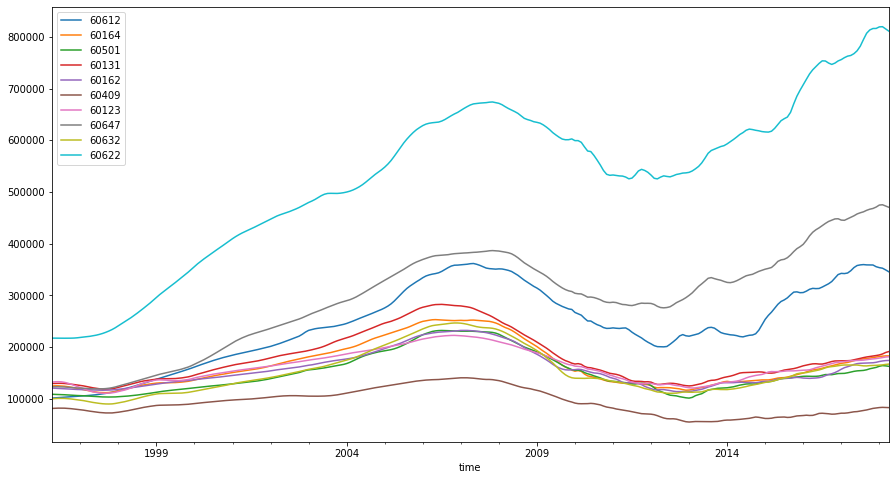

In [94]:
chicago_20_30.plot(figsize=(15,8));

In [86]:
all_regions = list(df_chi_metro.sort_values('ROI_5yrs', ascending=False)[0:30].RegionName)

In [87]:
top_30_df = pd.DataFrame()
top_30_df['time'] = pd.date_range(start='1996-04-01', end='2018-04-01', freq='MS')
top_30_df.set_index('time', inplace=True)
all_regions = list(df_chi_metro.sort_values('ROI_5yrs', ascending=False)[0:30].RegionName)
for region in all_regions:
    top_30_df[region] = melted_df[melted_df['RegionName'] == region].value.values

In [88]:
top_30_df

,60804,60085,60153,60110,60104,60505,60651,60073,60436,60639,...,60612,60164,60501,60131,60162,60409,60123,60647,60632,60622
time,,,,,,,,,,,,,,,,,,,,,
1996-04-01,96500.0,96100.0,88600.0,112100.0,97900.0,79300.0,74700.0,125200.0,78200.0,111200.0,...,100900.0,124400.0,108300.0,129100.0,120300.0,80900.0,131800.0,122700.0,99600.0,217000.0
1996-05-01,97000.0,96700.0,88400.0,113100.0,98300.0,80000.0,75100.0,126100.0,78300.0,111900.0,...,101400.0,124700.0,108100.0,129400.0,120000.0,81200.0,132500.0,122800.0,100100.0,216900.0
1996-06-01,97300.0,97100.0,88000.0,113600.0,98600.0,80200.0,75400.0,126600.0,78400.0,112300.0,...,101900.0,124700.0,107900.0,129500.0,119700.0,81500.0,132700.0,122800.0,100400.0,216900.0
1996-07-01,97300.0,97300.0,87600.0,113600.0,98700.0,80100.0,75600.0,126700.0,78500.0,112500.0,...,102300.0,124400.0,107600.0,129500.0,119300.0,81500.0,132400.0,122700.0,100400.0,216800.0
1996-08-01,97100.0,97200.0,86900.0,113100.0,98500.0,79700.0,75600.0,126400.0,78600.0,112500.0,...,102700.0,123900.0,107400.0,129200.0,119000.0,81400.0,131400.0,122400.0,100300.0,216800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,160500.0,107600.0,139200.0,158100.0,145300.0,125500.0,142900.0,143400.0,111200.0,226100.0,...,355200.0,180400.0,160300.0,183300.0,170200.0,81800.0,177400.0,470600.0,164300.0,816300.0
2018-01-01,161800.0,108600.0,142000.0,159200.0,146700.0,127600.0,145200.0,144600.0,112700.0,228700.0,...,353400.0,181300.0,162500.0,184400.0,171700.0,82600.0,178300.0,474500.0,164700.0,819300.0
2018-02-01,162900.0,110800.0,144100.0,160100.0,148300.0,129200.0,148300.0,146300.0,114100.0,231400.0,...,352300.0,182100.0,163800.0,186300.0,172800.0,83000.0,179300.0,475100.0,165200.0,819700.0


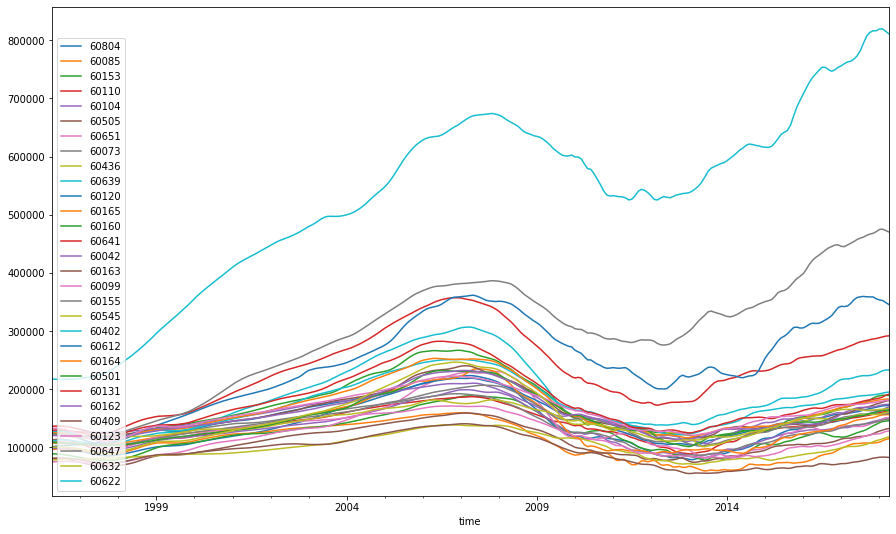

In [98]:
top_30_df.plot(figsize=(15,9))
plt.legend(loc='lower left');